# EDA on Loan Defaulters Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import roc_auc_score
import os

## Phases
* Phase 1 - Fill missing values and fix individual columns
* Phase 2 - Understand distributions
* Phase 3 - Analyze relationships
* Phase 4 - Let's see

## Load Data

In [3]:
raw_data_path = "../data/raw/"

df = pd.read_csv(raw_data_path+"Dataset.csv")

df.head()

C:\Users\ompan\AppData\Local\Temp\ipykernel_29568\396317518.py:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path+"Dataset.csv")


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


## Understand data

In [4]:
print(df.shape)
print(df.columns.tolist()[:11])
print(df.columns.tolist()[11:21])
print(df.columns.tolist()[21:31])
print(df.columns.tolist()[31:])

(121856, 40)
['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type']
['Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']
['Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_Family_Members', 'Client_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Client_Permanent_Match_Tag']
['Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

## Phase 1

### There are null values in this dataset and Columns (1,7,8,16,17,18,19,20,35) have mixed types

In [6]:
df.isna().sum().sort_values(ascending=False)

Own_House_Age                 80095
Score_Source_1                68835
Social_Circle_Default         61928
Client_Occupation             41435
Score_Source_3                26921
Credit_Bureau                 18540
ID_Days                        5968
Score_Source_2                 5686
Population_Region_Relative     4857
Loan_Annuity                   4812
Client_Income_Type             3701
Client_Housing_Type            3687
Phone_Change                   3664
Application_Process_Hour       3663
House_Own                      3661
Loan_Contract_Type             3651
Employed_Days                  3649
Client_Education               3645
Child_Count                    3638
Active_Loan                    3635
Credit_Amount                  3632
Bike_Owned                     3624
Registration_Days              3614
Type_Organization              3609
Client_Income                  3607
Age_Days                       3600
Car_Owned                      3581
Client_Marital_Status       

| Column                | Missing | Keep/Drop? | Strategy                                      |
| --------------------- | ------- | ---------- | --------------------------------------------- |
| Own_House_Age         | 65.7%   | Keep       | Impute 0 + Missing flag |
| Score_Source_1        | 56.4%   | Keep       | Median + Missing flag                         |
| Social_Circle_Default | 50.8%   | Keep       | Median + Missing flag                         |
| Client_Occupation     | 34.0%   | Keep       | Fill "Unknown"                                |
| Score_Source_3        | 22.1%   | Keep       | Median + Missing flag                         |
| Credit_Bureau         | 15.2%   | Keep       | Median + Missing flag                         |


### Handle mixed type columns first

In [7]:
bad_cols = [1,7,8,16,17,18,19,20,35]
for idx in bad_cols:
    col = df.columns[idx]
    print("\n\n=== Column:", col, "===")
    print(set([x for x in df[col] if (type(x) != float or type(x) != int)]))  # show sample unique values
    print(df[col].dtype)



=== Column: Client_Income ===
{'6930', nan, nan, '9004.5', nan, '18413.55', '6254.1', '10845', nan, '40050', 16425.0, 8235.0, '9690.75', '44235', '10215', '7497', '18315', '7245', nan, '3510', 32850.0, nan, '19350', 16470.0, nan, '11385', '4612.05', '27891', '19269.45', nan, nan, '37687.5', nan, '29610', '19215', '5850', 16515.0, 8325.0, nan, '19755', 24750.0, 16560.0, 8370.0, '11677.5', nan, '13702.5', '11911.95', nan, '41602.95', '35910', 8415.0, '16785', '12869.55', 16614.0, '10380.15', '17164.35', nan, '6300', '13770', '10692', nan, 57600.0, '11731.95', 16650.0, 8460.0, '11565', '8955', nan, nan, nan, nan, '12851.1', nan, nan, nan, nan, nan, '22013.1', '36206.1', '40950', '32731.65', '21510', '8262.45', 49500.0, 16740.0, 8550.0, 16749.0, '22320', '13207.5', nan, nan, '23174.1', 24975.0, '26865', nan, '30555', '18450', '19165.1535', nan, nan, '3150', '6354.45', '13005.9', '4148.55', '5400', '17820', nan, 41400.0, '12391.65', 25026.3, nan, '18765', nan, '5620.95', '14550.75', '1291

In [8]:
# fix each column
for idx in bad_cols:
    col = df.columns[idx]
    df[col] = (
        df[col]
        .astype(str)           # convert everything to string
        .str.replace(",", "")  # remove commas
        .str.strip()           # strip spaces
        .replace(["", " ", "nan", "NaN", "None"], np.nan)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
for idx in bad_cols:
    col = df.columns[idx]
    print(df[col].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

### For missing value count less than 10% of the entries, fill with mean for numeric data and mode for categorical

In [11]:
for col in df.columns:
    missing_pct = df[col].isna().mean() * 100
    if df[col].nunique(dropna=True) == 2:
        df[col] = df[col].astype('category')
    # Only fill missing if missing < 10%
    if missing_pct <= 10 and missing_pct > 0:
        
        # Numeric columns → fill with mean
        if df[col].dtype in ['int64', 'float64']:
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)
        
        # Categorical columns → fill with mode
        else:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)

In [12]:
(df.isna().mean().sort_values(ascending=False) * 100)[:7]  # % missing

Own_House_Age            65.729221
Score_Source_1           56.488806
Social_Circle_Default    50.820641
Client_Occupation        34.003250
Score_Source_3           22.093290
Credit_Bureau            15.214680
ID                        0.000000
dtype: float64

### Create missing-value flags

In [13]:
high_missing_cols = [
    'Own_House_Age',
    'Score_Source_1',
    'Social_Circle_Default',
    'Client_Occupation',
    'Score_Source_3',
    'Credit_Bureau',
]

### Visualize missingness correlation

In [14]:
(df.isna().mean().sort_values(ascending=False) * 100)[:7]  # % missing

Own_House_Age            65.729221
Score_Source_1           56.488806
Social_Circle_Default    50.820641
Client_Occupation        34.003250
Score_Source_3           22.093290
Credit_Bureau            15.214680
ID                        0.000000
dtype: float64

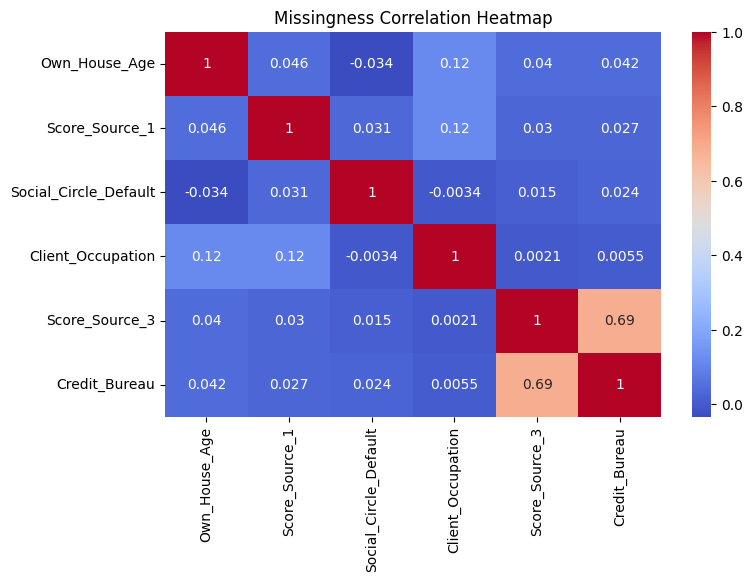

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df[high_missing_cols].isna().corr(), annot=True, cmap="coolwarm")
plt.title("Missingness Correlation Heatmap")
plt.show()

In [19]:
# Check their individual predictive power
for col in ['Credit_Bureau', 'Score_Source_3']:
    auc = roc_auc_score(df['Default'], df[col].fillna(df[col].median()))
    print(col, auc)

Credit_Bureau 0.5118346322176812
Score_Source_3 0.3570683648166511


score source 3 when inverted, might be helpful

In [20]:
auc_flipped = roc_auc_score(df['Default'], -df['Score_Source_3'].fillna(df['Score_Source_3'].median()))
auc_flipped

0.6429316351833487

Now, fixing individual columns of high missing data

In [27]:
# "missing" means "rent"
df['Own_House_Age_Missing'] = df['Own_House_Age'].isna().astype(int)
df['Own_House_Age'] = df['Own_House_Age'].fillna(0)


In [28]:
# If missing - customer wasn’t scored - often higher risk.
df['Score_Source_1_missing'] = df['Score_Source_1'].isna().astype(int)
df['Score_Source_1'] = df['Score_Source_1'].fillna(df['Score_Source_1'].median())

In [29]:
# Defaults among friends/family - extremely predictive
df['Social_Circle_Default_missing'] = df['Social_Circle_Default'].isna().astype(int)
df['Social_Circle_Default'] = df['Social_Circle_Default'].fillna(0)

In [30]:
# missing occupation -> high risk
df['Client_Occupation'] = df['Client_Occupation'].fillna("Unknown")

In [31]:
# 
df['Score_Source_3_missing'] = df['Score_Source_3'].isna().astype(int)
df['Score_Source_3'] = df['Score_Source_3'].fillna(df['Score_Source_3'].median())

In [32]:
# missing credit info - medium risk
df['Credit_Bureau_missing'] = df['Credit_Bureau'].isna().astype(int)
df['Credit_Bureau'] = df['Credit_Bureau'].fillna(df['Credit_Bureau'].median())

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   ID                             121856 non-null  int64   
 1   Client_Income                  121856 non-null  float64 
 2   Car_Owned                      121856 non-null  category
 3   Bike_Owned                     121856 non-null  category
 4   Active_Loan                    121856 non-null  category
 5   House_Own                      121856 non-null  category
 6   Child_Count                    121856 non-null  float64 
 7   Credit_Amount                  121856 non-null  float64 
 8   Loan_Annuity                   121856 non-null  float64 
 9   Accompany_Client               121856 non-null  object  
 10  Client_Income_Type             121856 non-null  object  
 11  Client_Education               121856 non-null  object  
 12  Client_Marital_S

In [35]:
# 3. Separate numeric and categorical among low-missing columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("\nNumeric :", numeric_cols.tolist())
print("Categorical :", categorical_cols.tolist())


Numeric : ['ID', 'Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 'Client_Family_Members', 'Client_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Own_House_Age_Missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing']
Categorical : ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization', 'Default']


### I'm happy with these columns - no missing values, got some more info(columns) out of missing items, etc.

### Save Data as it is now. Use it to start proper EDA and a little more feature-engineering

In [37]:
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/dataset_cleaned_v1.csv", index=False)

## Phase 2 - Next Notebook